# Cerebellar volumetry and cortical thickness covariance 
## Data: 
    - 1. Freesurfer cortical thickness measures in Des/DKT atlas;
    - 2. Cerebellar lobular volumnes from SUIT/MDTB/MAGeT softwares; 
## Atlases
    -1. Des 2009a: L+R: 74 regions + WhiteSurfArea_area + MeanThickness_thickness
    -2. DKT:       L+R: 31 regions + WhiteSurfArea_area + MeanThickness_thickness
## Cohorts
- The augmented cohort 211: MNI ET/ matched NC (34/177).

## Structrual cov construction
- 1. Remove the effect of age/sex/eTIV with residual method;
- 2. calculate the correlation matrix;
- 3. z-transform based on control mean and standard deviation for comparison with FDR correction at significance level of 0.05.

## Tasks: exploring the structural covariance with cerebellar/lolbular volumes 
- 1. Structrial differences between ET and NC 
- 2. ROIs of cerebellum:
- 3. SUIT/MAGeT cerebellar volume VS left, right hemisphere... 
- 4. Discuss with Nikhil about the construction of structrual covariance. 
## recommendations from literature
    - use cortical volumne/surface areas
Ref: 
1. [Reliability and comparability of human brain structural covariance networks](https://www.sciencedirect.com/science/article/pii/S1053811920305905?via%3Dihub)
2. [Freesurfer cortical thickness calculation](https://surfer.nmr.mgh.harvard.edu/fswiki/VolumeRoiCorticalThickness)
3. 

In [1]:
#reading/merging/selecting data
from pathlib import Path
import nipype.interfaces.io as nio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

codes_dir =  Path("/codes")
data_dir = codes_dir / "tab_data"
fig_dir  = codes_dir / "stats" / "figs"
sys.path.append(str(codes_dir))

# data files
matched_des_all_file = data_dir/ 'matched_Des-all_qced.csv'
matched_DKT_all_file = data_dir/ 'matched_DKT-all_qced.csv'
data_df = pd.read_csv(matched_DKT_all_file , sep=',', header=0, index_col=0);

cerebellum_list_old = ['Left_Cerebellum_White_Matter','Left_Cerebellum_Cortex','Right_Cerebellum_White_Matter','Right_Cerebellum_Cortex'];
cerebellum_list = ['L_WM','L_GM','R_WM','R_GM'];
data_df[cerebellum_list]=data_df.loc[:,cerebellum_list_old];
data_df=data_df.drop(columns=cerebellum_list_old);

220321-20:35:16,575 nipype.utils WARNING:
	 A newer version (1.7.0) of nipy/nipype is available. You are using 1.5.0


In [2]:
# preproc ROI list for analysis
# cerebellum ROIs
SUIT_l_labels_ = ['Left_I_IV',  'Left_V', 'Left_VI', 'Left_CrusI', 'Left_CrusII', 
                 'Left_VIIb', 'Left_VIIIa', 'Left_VIIIb', 'Left_IX', 'Left_X', 
                 'Left_Dentate', 'Left_Interposed', 'Left_Fastigial'];
SUIT_r_labels_ = ['Right_I_IV','Right_V','Right_VI','Right_CrusI','Right_CrusII',
                 'Right_VIIb','Right_VIIIa','Right_VIIIb','Right_IX','Right_X',
                 'Right_Dentate','Right_Interposed','Right_Fastigial'];
SUIT_v_labels = ['Vermis_VI', 'Vermis_CrusI', 'Vermis_CrusII', 'Vermis_VIIb', 
                 'Vermis_VIIIa','Vermis_VIIIb', 'Vermis_IX', 'Vermis_X'];
MAGeT_l_labels = ['L_I_IV',  'L_V', 'L_VI', 'L_Crus_I', 'L_Crus_II', 
                 'L_VIIB', 'L_VIIIA', 'L_VIIIB', 'L_IX', 'L_X'];  # NO  'Left_Dentate', 'Left_Interposed', 'Left_Fastigial'
MAGeT_r_labels = ['R_I_IV','R_V','R_VI','R_Crus_I','R_Crus_II',
                 'R_VIIB','R_VIIIA','R_VIIIB','R_IX','R_X'];  # NO  'Right_Dentate','Right_Interposed','Right_Fastigial'
length_lobule_list=len(MAGeT_l_labels)
SUIT_l_labels = SUIT_l_labels_[:length_lobule_list];
SUIT_r_labels = SUIT_r_labels_[:length_lobule_list];
#cerebellum_list = ['Left_Cerebellum_WM','Left_Cerebellum_GM','Right_Cerebellum_WM','Right_Cerebellum_GM'];

# Freesurfer 'Destrieux' 2009a atlas, and DKT atlas ROIs:
Des_atlas_str="lh_G&S_frontomargin_thickness	lh_G&S_occipital_inf_thickness	lh_G&S_paracentral_thickness	lh_G&S_subcentral_thickness	lh_G&S_transv_frontopol_thickness	lh_G&S_cingul-Ant_thickness	lh_G&S_cingul-Mid-Ant_thickness	lh_G&S_cingul-Mid-Post_thickness	lh_G_cingul-Post-dorsal_thickness	lh_G_cingul-Post-ventral_thickness	lh_G_cuneus_thickness	lh_G_front_inf-Opercular_thickness	lh_G_front_inf-Orbital_thickness	lh_G_front_inf-Triangul_thickness	lh_G_front_middle_thickness	lh_G_front_sup_thickness	lh_G_Ins_lg&S_cent_ins_thickness	lh_G_insular_short_thickness	lh_G_occipital_middle_thickness	lh_G_occipital_sup_thickness	lh_G_oc-temp_lat-fusifor_thickness	lh_G_oc-temp_med-Lingual_thickness	lh_G_oc-temp_med-Parahip_thickness	lh_G_orbital_thickness	lh_G_pariet_inf-Angular_thickness	lh_G_pariet_inf-Supramar_thickness	lh_G_parietal_sup_thickness	lh_G_postcentral_thickness	lh_G_precentral_thickness	lh_G_precuneus_thickness	lh_G_rectus_thickness	lh_G_subcallosal_thickness	lh_G_temp_sup-G_T_transv_thickness	lh_G_temp_sup-Lateral_thickness	lh_G_temp_sup-Plan_polar_thickness	lh_G_temp_sup-Plan_tempo_thickness	lh_G_temporal_inf_thickness	lh_G_temporal_middle_thickness	lh_Lat_Fis-ant-Horizont_thickness	lh_Lat_Fis-ant-Vertical_thickness	lh_Lat_Fis-post_thickness	lh_Pole_occipital_thickness	lh_Pole_temporal_thickness	lh_S_calcarine_thickness	lh_S_central_thickness	lh_S_cingul-Marginalis_thickness	lh_S_circular_insula_ant_thickness	lh_S_circular_insula_inf_thickness	lh_S_circular_insula_sup_thickness	lh_S_collat_transv_ant_thickness	lh_S_collat_transv_post_thickness	lh_S_front_inf_thickness	lh_S_front_middle_thickness	lh_S_front_sup_thickness	lh_S_interm_prim-Jensen_thickness	lh_S_intrapariet&P_trans_thickness	lh_S_oc_middle&Lunatus_thickness	lh_S_oc_sup&transversal_thickness	lh_S_occipital_ant_thickness	lh_S_oc-temp_lat_thickness	lh_S_oc-temp_med&Lingual_thickness	lh_S_orbital_lateral_thickness	lh_S_orbital_med-olfact_thickness	lh_S_orbital-H_Shaped_thickness	lh_S_parieto_occipital_thickness	lh_S_pericallosal_thickness	lh_S_postcentral_thickness	lh_S_precentral-inf-part_thickness	lh_S_precentral-sup-part_thickness	lh_S_suborbital_thickness	lh_S_subparietal_thickness	lh_S_temporal_inf_thickness	lh_S_temporal_sup_thickness	lh_S_temporal_transverse_thickness"
DKT_atlas_str="lh_caudalanteriorcingulate_thickness	lh_caudalmiddlefrontal_thickness	lh_cuneus_thickness	lh_entorhinal_thickness	lh_fusiform_thickness	lh_inferiorparietal_thickness	lh_inferiortemporal_thickness	lh_isthmuscingulate_thickness	lh_lateraloccipital_thickness	lh_lateralorbitofrontal_thickness	lh_lingual_thickness	lh_medialorbitofrontal_thickness	lh_middletemporal_thickness	lh_parahippocampal_thickness	lh_paracentral_thickness	lh_parsopercularis_thickness	lh_parsorbitalis_thickness	lh_parstriangularis_thickness	lh_pericalcarine_thickness	lh_postcentral_thickness	lh_posteriorcingulate_thickness	lh_precentral_thickness	lh_precuneus_thickness	lh_rostralanteriorcingulate_thickness	lh_rostralmiddlefrontal_thickness	lh_superiorfrontal_thickness	lh_superiorparietal_thickness	lh_superiortemporal_thickness	lh_supramarginal_thickness	lh_transversetemporal_thickness	lh_insula_thickness"
Des_roi_list=[x.replace('-','_')[3:-10] for x in Des_atlas_str.split('\t')]
DKT_roi_list=[x.replace('-','_')[3:-10] for x in DKT_atlas_str.split('\t')]

# additional regions in cortical thickness and cortical areas
#+['lh_MeanThickness_thickness'];  
#+['rh_MeanThickness_thickness'];  
#+['lh_WhiteSurfArea_area']; 
#+['rh_WhiteSurfArea_area'];

def creat_Atlas_list(roi_list):
    lh_list = ['lh_'+x for x in roi_list];
    rh_list = ['rh_'+x for x in roi_list];
    # cortical thickness
    lh_cth_list = [x+'_thickness' for x in lh_list]+['lh_MeanThickness_thickness'];  
    rh_cth_list = [x+'_thickness' for x in rh_list]+['rh_MeanThickness_thickness'];  
    #
    lh_Vol_list = [x+'_volume' for x in lh_list];  
    rh_Vol_list = [x+'_volume' for x in rh_list];
    # 
    lh_area_list = [x+'_area' for x in lh_list]+['lh_WhiteSurfArea_area']; 
    rh_area_list = [x+'_area' for x in rh_list]+['rh_WhiteSurfArea_area'];
    # _meancurv
    lh_curv_list = [x+'_meancurv' for x in lh_list]; 
    rh_curv_list = [x+'_meancurv' for x in rh_list];
    res = {"l_cth":lh_cth_list,   "r_cth":rh_cth_list,
           "l_vol":lh_Vol_list,   "r_vol":rh_Vol_list,
           "l_area":lh_area_list, "r_area":rh_area_list,
           "l_curv":lh_curv_list, "r_curv":rh_curv_list,
           "l_list":lh_list,      "r_list":rh_list} 
    return res
Des_list_dict=creat_Atlas_list(Des_roi_list)
DKT_list_dict=creat_Atlas_list(DKT_roi_list)

In [3]:
# Preparing data:
import numpy.matlib as matlib
import scipy.stats as sci_sts
from utils_.utils import ctr_tiv, glm_test, rep_model, ctr_by_nc, cal_es, creat_Bonf_df

cerebellar_tar_suit_list  = cerebellum_list+SUIT_l_labels +SUIT_r_labels;
cerebellar_tar_maget_list = cerebellum_list+MAGeT_l_labels+MAGeT_r_labels;

def data_prep(df, etiv_, cort_measure, cort_atlas, cere_measure, confound_ctr, alpha_):
    res_dict={}
    for cortical_m_ in cort_measure:
        res_dict[cortical_m_]={};
        if cort_atlas=='DKT':
            tar_list = cere_measure+DKT_list_dict['l_'+cortical_m_] + DKT_list_dict['r_'+cortical_m_];
            res_dict[cortical_m_]['cortical_list']= DKT_list_dict['l_'+cortical_m_] + DKT_list_dict['r_'+cortical_m_];
        else:
            tar_list = cere_measure+Des_list_dict['l_'+cortical_m_] + Des_list_dict['r_'+cortical_m_];
            res_dict[cortical_m_]['cortical_list']= Des_list_dict['l_'+cortical_m_] + Des_list_dict['r_'+cortical_m_];
        res_dict[cortical_m_]['cerebellar_list']= cere_measure;
        len_mat  = len(tar_list);
        if confound_ctr==1:
            print('\tcontrolling confounding effect...')
            info_list= ['group', etiv_];
            cov_list = ['age','male', 'is_mni','is_ppmi','is_adni']
            vis_df_   = df.loc[:, info_list+cov_list+tar_list].copy()
            offset_str=-len(etiv_+"_"+"_".join(cov_list))-1;
            res_df, res_new_col_1 = ctr_tiv(vis_df_, tar_list, etiv_, cov_list, 'rm_norm')
            #res_dict[cortical_m_]={};
            res_dict[cortical_m_]['res']=res_df; 
            res_dict[cortical_m_]['new_list']=res_new_col_1;
            res_new_col  = [x[:offset_str] for x in res_new_col_1]
            et_tmp = res_df[res_df['group']=='ET'].copy(); et_tmp=et_tmp.drop(columns=res_new_col);#et_tmp.loc[:]
            nc_tmp = res_df[res_df['group']=='NC'].copy(); nc_tmp=nc_tmp.drop(columns=res_new_col);
            et_tmp_ = et_tmp.loc[:,res_new_col_1].copy();  et_tmp_.columns=res_new_col;
            nc_tmp_ = nc_tmp.loc[:,res_new_col_1].copy();  nc_tmp_.columns=res_new_col;
            #display(et_tmp_)
            #display(nc_tmp_)
            res_dict[cortical_m_]['ET']=et_tmp_;
            res_dict[cortical_m_]['NC']=nc_tmp_; 
        else:
            print('\tdata selection...')
            vis_df_ = df.copy()
            res_dict[cortical_m_]['res']=[]; 
            et_tmp = vis_df_[vis_df_['group']=='ET'];
            nc_tmp = vis_df_[vis_df_['group']=='NC'];
            res_dict[cortical_m_]['new_list']=tar_list;
            res_dict[cortical_m_]['ET']=et_tmp.loc[:, tar_list];
            res_dict[cortical_m_]['NC']=nc_tmp.loc[:, tar_list];
        
        ## cov cal and filter @ alpha_
        nc_corr = res_dict[cortical_m_]['NC'].corr().copy()
        et_corr = res_dict[cortical_m_]['ET'].corr().copy()
        nc_corr_mean = nc_corr.mean(axis=1); nc_mean_mat = matlib.repmat(nc_corr_mean, len_mat, 1);
        nc_corr_std  = nc_corr.std(axis=1);  nc_std_mat  = matlib.repmat(nc_corr_std , len_mat, 1);
        nc_z_mat=(nc_corr-nc_mean_mat)/nc_std_mat;
        et_z_mat=(et_corr-nc_mean_mat)/nc_std_mat;
        et_p_mat=sci_sts.norm.sf(abs(et_z_mat))*2 
        nc_p_mat=sci_sts.norm.sf(abs(nc_z_mat))*2
        res_dict[cortical_m_]['NC_corr'] = nc_corr;  res_dict[cortical_m_]['ET_corr']= et_corr;
        res_dict[cortical_m_]['NC_z']    = nc_z_mat; res_dict[cortical_m_]['ET_z']   = et_z_mat;
        res_dict[cortical_m_]['NC_p']    = pd.DataFrame(nc_p_mat, index=tar_list, columns=tar_list);
        res_dict[cortical_m_]['ET_p']    = pd.DataFrame(et_p_mat, index=tar_list, columns=tar_list);
    return res_dict

#
vis_df=data_df.copy()
alpha=0.05
cort_atlas_='DKT'
# control for covariates: age/sex/eTIV
cortical_measures=['cth', 'area', 'vol'];
suit_raw_DKT=data_prep(vis_df,  'eTIV', cortical_measures, cort_atlas_, cerebellar_tar_suit_list,  0, alpha);
suit_ctr_DKT=data_prep(vis_df,  'eTIV', cortical_measures, cort_atlas_, cerebellar_tar_suit_list,  1, alpha);
maget_raw_DKT=data_prep(vis_df, 'eTIV', cortical_measures, cort_atlas_, cerebellar_tar_maget_list, 0, alpha);
maget_ctr_DKT=data_prep(vis_df, 'eTIV', cortical_measures, cort_atlas_, cerebellar_tar_maget_list, 1, alpha);

	data selection...
	data selection...
	data selection...
	controlling confounding effect...
Using  rm_norm
New columns 88
	controlling confounding effect...
Using  rm_norm
New columns 88
	controlling confounding effect...
Using  rm_norm
New columns 86
	data selection...
	data selection...
	data selection...
	controlling confounding effect...
Using  rm_norm
New columns 88
	controlling confounding effect...
Using  rm_norm
New columns 88
	controlling confounding effect...
Using  rm_norm
New columns 86


In [4]:
# select data
cth_diff_suit_df  = suit_ctr_DKT['cth']['ET_corr']-suit_ctr_DKT['cth']['NC_corr']
vol_diff_suit_df  = suit_ctr_DKT['vol']['ET_corr']-suit_ctr_DKT['vol']['NC_corr']
area_diff_suit_df = suit_ctr_DKT['area']['ET_corr']-suit_ctr_DKT['area']['NC_corr']

cth_diff_maget_df = maget_ctr_DKT['cth']['ET_corr']-maget_ctr_DKT['cth']['NC_corr']
vol_diff_maget_df = maget_ctr_DKT['vol']['ET_corr']-maget_ctr_DKT['vol']['NC_corr']
area_diff_maget_df= maget_ctr_DKT['area']['ET_corr']-maget_ctr_DKT['area']['NC_corr']

# format vis dataframe
cere_labels=suit_ctr_DKT['cth']['cerebellar_list']; cere_len = len(cere_labels);
cort_labels=suit_ctr_DKT['cth']['cortical_list'];   cort_len = len(cort_labels);

figure not saved...
figure not saved...


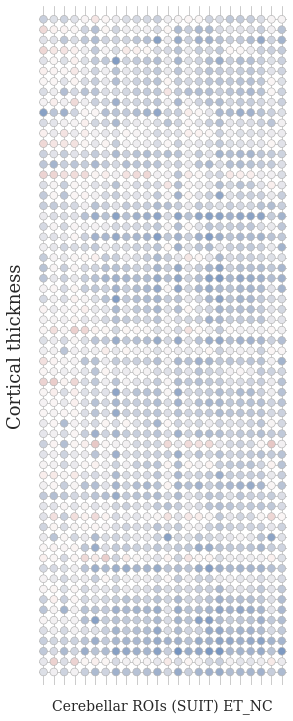

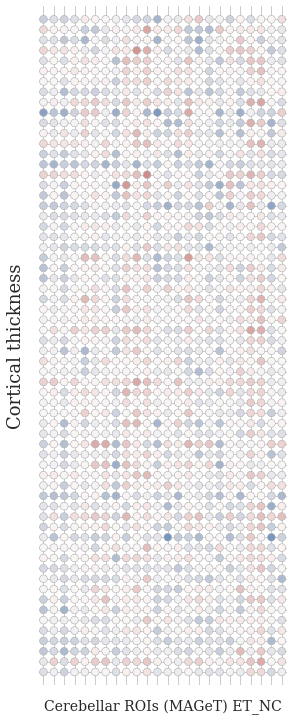

In [5]:
# structral cov vis
figure_size=(16, 60); 
FONT_SCALE=0.85;
LEGEND_ON=0;
x_tick_rotation=65
y_tick_rotation=0
y_tick_label_on=1
x_tick_label_on=0

save_fig=0;
##
off_set_cth=-10; off_set_vol=-7; off_set_area=-5;  
# for label in g2.ax.get_xticklabels():
#    label.set_rotation(x_tick_rotation)

def corr_vis(df_, offset_part, off_set_, titile_str, FONT_SCALE_, figure_size_, legend_on, x_tick_label_on_, y_tick_label_on_, save_fig):
    sns.set_theme(style="whitegrid", palette="pastel", font_scale=FONT_SCALE)
    sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
    df_= df_.iloc[:offset_part, offset_part:].copy()
    df_=df_.rename(lambda x: x[:off_set_], axis='columns')
    df_vis=df_.stack().reset_index(name="Correlation")
    #vis
    g1 = sns.relplot(
        data=df_vis, x="level_0", y="level_1", hue="Correlation", size="Correlation",
        palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
        height=10, sizes=(60, 60),legend=False);
    if legend_on:
        for artist in g1.legend.legendHandles:
            artist.set_edgecolor(".7")
        g1.legend.set(bbox_to_anchor=(0.65, 0.7))
        g1.add_legend()
   
    # Tweak the figure
    g1.set(aspect="equal")
    g1.despine(left=True, bottom=True)
    g1.ax.margins(.02)
    g1.set_xlabels(titile_str, fontdict={'fontsize':14})
    for label in g1.ax.get_xticklabels():
        label.set_rotation(x_tick_rotation)
    #
    if y_tick_label_on_:
        g1.set_ylabels("Cortical thickness", fontdict={'fontsize':18})
    else:
        g1.set(ylabel="")
    g1.set(yticklabels=[])
    #
    if x_tick_label_on_:
        g1.set_xlabels("Cortical thickness", fontdict={'fontsize':18})
    else:
        g1.set(xticklabels=[])
    #g1.tight_layout()
    if save_fig: 
        print('saving...'); 
        g1.savefig((fig_dir/("Fig3_"+titile_str+".jpg")), dpi=300, bbox_inches='tight', pad_inches=0.1)
    else:
        print('figure not saved...')

# SUIT vs DKT cth           
titile_str='Cerebellar ROIs (SUIT) ET_NC'
corr_vis(cth_diff_suit_df, cere_len, off_set_cth, titile_str, FONT_SCALE, figure_size, LEGEND_ON, x_tick_label_on, y_tick_label_on, save_fig)

# MAGeT vs DKT cth           
titile_str='Cerebellar ROIs (MAGeT) ET_NC'
corr_vis(cth_diff_maget_df, cere_len, off_set_cth, titile_str, FONT_SCALE, figure_size, LEGEND_ON, x_tick_label_on, y_tick_label_on, save_fig)

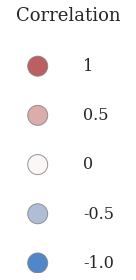

In [6]:
# plot legend
#legend_list={-1: '-1.0', -0.5: '-0.5',0:'0' ,0.5:'0.5',1:'1.0'};
save_fig=0;
legend_x_data=[1,1,1,1,1]; legend_y_data=[-1.0,-0.5,0,0.5,1]; 
from matplotlib import cm
fig, ax = plt.subplots(figsize=(2, 4))
viridis=cm.get_cmap('vlag', 5)
ax.scatter(legend_x_data, legend_y_data, c=viridis.colors, s=400, alpha=0.8, edgecolors='gray')
ax.set_ylim([-1.1,1.4])
ax.set_xlim([0.6,2.2])
for x in range(5):
    plt.text(1.6,legend_y_data[x], s=str(legend_y_data[x]), verticalalignment='center', fontdict={'fontsize':16})
ax.set_title('Correlation', fontdict={'fontsize':18})
ax.axis('off')
fig.tight_layout()
if save_fig:
    print('saving legend...'); fig.savefig((fig_dir/("Fig3_legend.jpg")), dpi=300, bbox_inches='tight', pad_inches=0.1)

saving...
saving...
saving...
saving...
Index(['L_WM', 'L_GM', 'R_WM', 'R_GM', 'Left_I_IV', 'Left_V', 'Left_VI',
       'Left_CrusI', 'Left_CrusII', 'Left_VIIb', 'Left_VIIIa', 'Left_VIIIb',
       'Left_IX', 'Left_X', 'Right_I_IV', 'Right_V', 'Right_VI', 'Right_CrusI',
       'Right_CrusII', 'Right_VIIb', 'Right_VIIIa', 'Right_VIIIb', 'Right_IX',
       'Right_X', 'lh_caudalanteriorcingulate_thickness',
       'lh_caudalmiddlefrontal_thickness', 'lh_cuneus_thickness',
       'lh_entorhinal_thickness', 'lh_fusiform_thickness',
       'lh_inferiorparietal_thickness', 'lh_inferiortemporal_thickness',
       'lh_isthmuscingulate_thickness', 'lh_lateraloccipital_thickness',
       'lh_lateralorbitofrontal_thickness', 'lh_lingual_thickness',
       'lh_medialorbitofrontal_thickness', 'lh_middletemporal_thickness',
       'lh_parahippocampal_thickness', 'lh_paracentral_thickness',
       'lh_parsopercularis_thickness', 'lh_parsorbitalis_thickness',
       'lh_parstriangularis_thickness', 'lh_

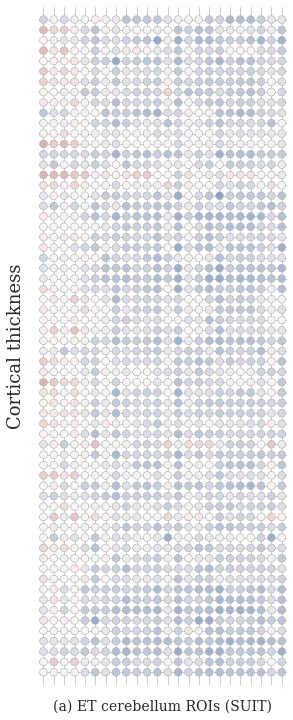

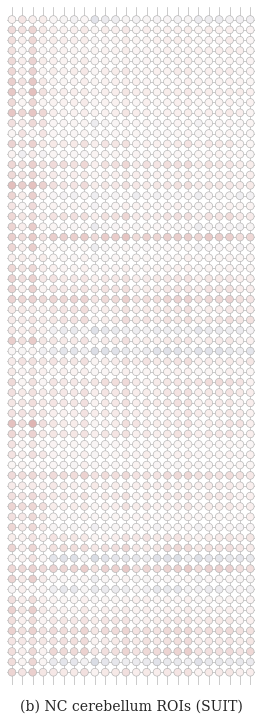

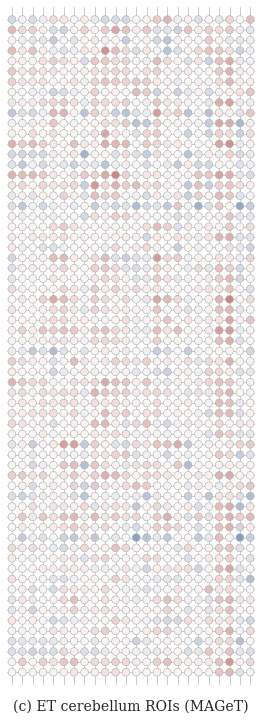

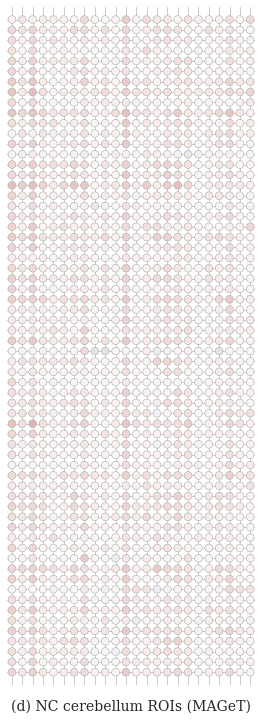

In [7]:
cth_diff_suit_df  = suit_ctr_DKT['cth']['ET_corr']-suit_ctr_DKT['cth']['NC_corr']
cth_diff_maget_df = maget_ctr_DKT['cth']['ET_corr']-maget_ctr_DKT['cth']['NC_corr']
save_fig=0

# SUIT cth stru_cov of ET and NC          
titile_str='(a) ET cerebellum ROIs (SUIT)'
corr_vis(suit_ctr_DKT['cth']['ET_corr'], cere_len, off_set_cth, titile_str, FONT_SCALE, figure_size, 0, 0, 1, save_fig)

titile_str='(b) NC cerebellum ROIs (SUIT)'
corr_vis(suit_ctr_DKT['cth']['NC_corr'], cere_len, off_set_cth, titile_str, FONT_SCALE, figure_size, 0, 0, 0, save_fig)

# MAGeT cth stru_cov of ET and NC          
titile_str='(c) ET cerebellum ROIs (MAGeT)'
corr_vis(maget_ctr_DKT['cth']['ET_corr'], cere_len, off_set_cth, titile_str, FONT_SCALE, figure_size, 0, 0, 0, save_fig)

titile_str='(d) NC cerebellum ROIs (MAGeT)'
corr_vis(maget_ctr_DKT['cth']['NC_corr'], cere_len, off_set_cth, titile_str, FONT_SCALE, figure_size, 0, 0, 0, save_fig)
print(cth_diff_suit_df.columns)

Index(['group', 'SUIT Right_CrusI', 'SUIT Left_CrusI',
       'lh_paracentral_thickness', 'rh_paracentral_thickness',
       'lh_lateralorbitofrontal_thickness',
       'rh_lateralorbitofrontal_thickness', 'MAGeT Right_CrusI',
       'MAGeT Left_CrusI'],
      dtype='object')
X and Y:  SUIT Left_CrusI lh_paracentral_thickness
X and Y:  SUIT Right_CrusI lh_paracentral_thickness
X and Y:  MAGeT Left_CrusI lh_paracentral_thickness
X and Y:  MAGeT Right_CrusI lh_paracentral_thickness
figure not saved...
X and Y:  SUIT Left_CrusI rh_paracentral_thickness
X and Y:  SUIT Right_CrusI rh_paracentral_thickness
X and Y:  MAGeT Left_CrusI rh_paracentral_thickness
X and Y:  MAGeT Right_CrusI rh_paracentral_thickness
figure not saved...
X and Y:  SUIT Left_CrusI lh_lateralorbitofrontal_thickness
X and Y:  SUIT Right_CrusI lh_lateralorbitofrontal_thickness
X and Y:  MAGeT Left_CrusI lh_lateralorbitofrontal_thickness
X and Y:  MAGeT Right_CrusI lh_lateralorbitofrontal_thickness
figure not saved...
X a

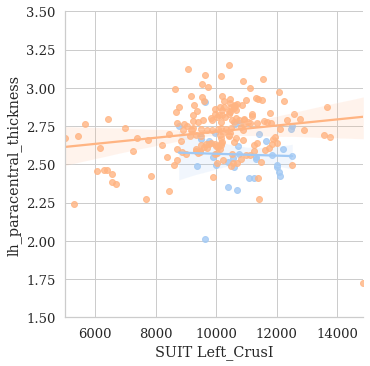

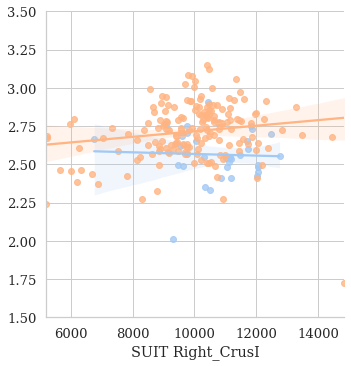

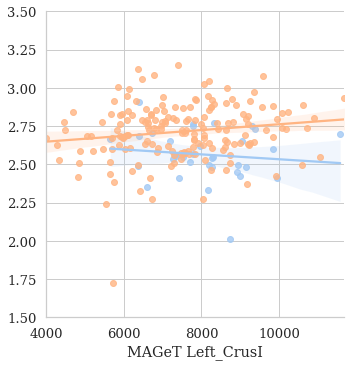

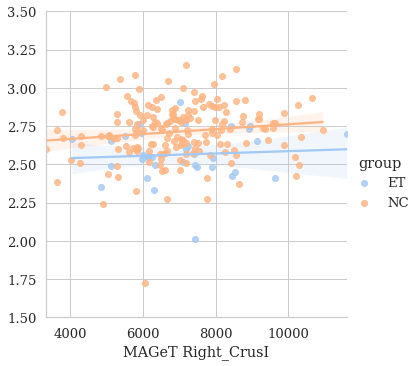

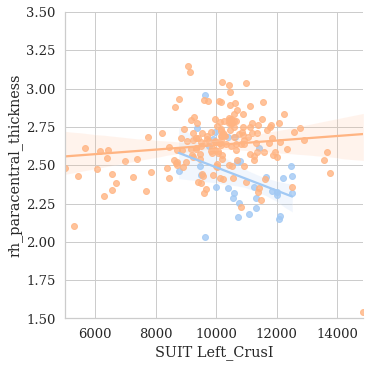

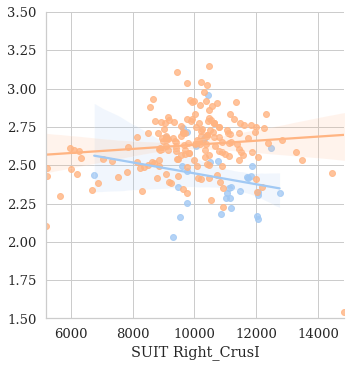

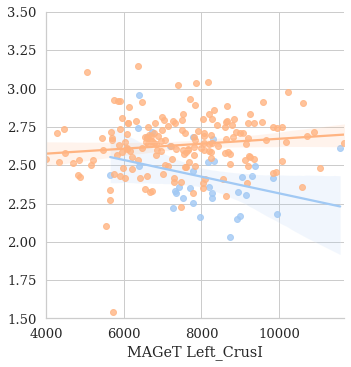

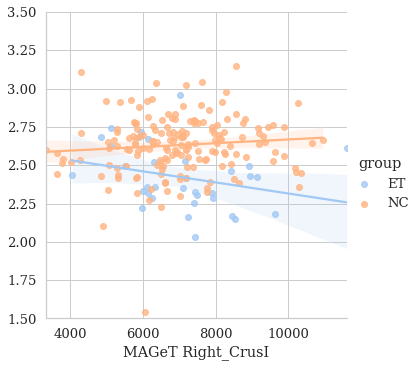

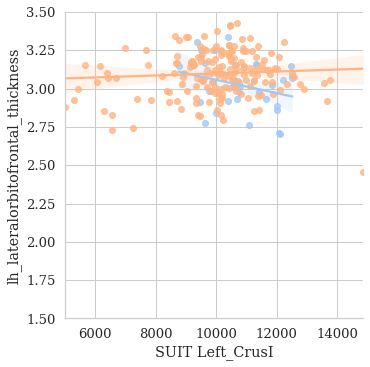

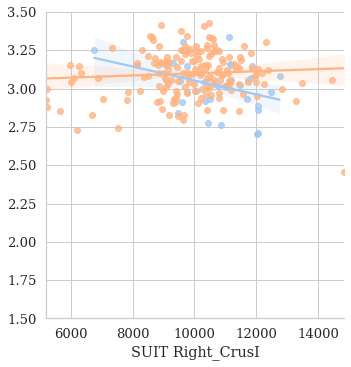

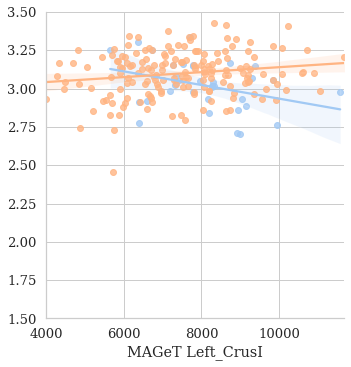

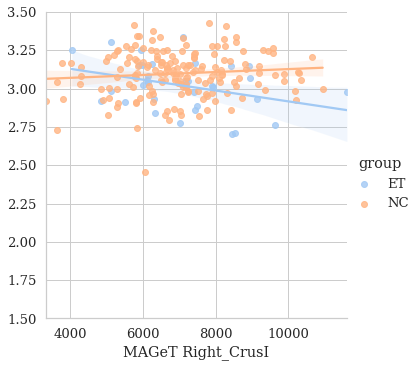

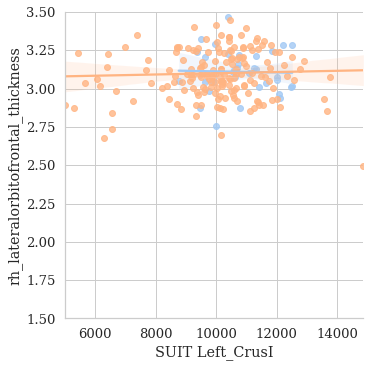

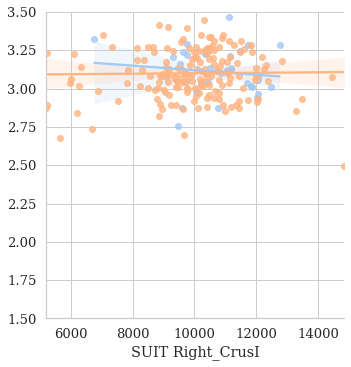

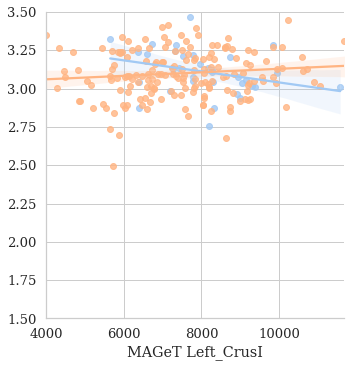

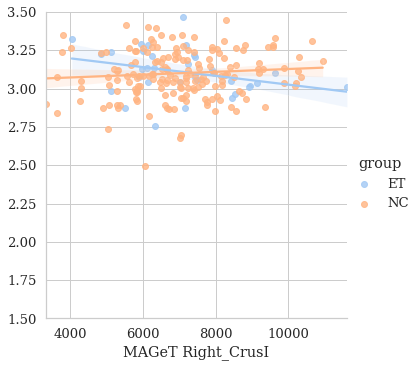

In [13]:
# Scatter plot
basci_info_list=['group'];
cth_list= ['lh_paracentral_thickness', 'rh_paracentral_thickness', 'lh_lateralorbitofrontal_thickness', 'rh_lateralorbitofrontal_thickness'];
cth_ctr_list = [x+'_eTIV_age_male_is_mni_is_ppmi_is_adni' for x in cth_list]

suit_list=['Right_CrusI','Left_CrusI']
suit_ctr_list=[x+'_eTIV_age_male_is_mni_is_ppmi_is_adni' for x in suit_list]
curr_suit_list = ['SUIT '+x for x in suit_list]
maget_list=['R_Crus_I','L_Crus_I']
curr_maget_list=['MAGeT '+x for x in suit_list]
maget_ctr_list=[x+'_eTIV_age_male_is_mni_is_ppmi_is_adni' for x in maget_list]

if 'tmp_df' in locals():
    del tmp_df
tmp_df=suit_ctr_DKT['cth']['res'][basci_info_list+suit_ctr_list+cth_ctr_list].copy();
tmp_df.columns=[basci_info_list+curr_suit_list+cth_list];
tmp_df[curr_maget_list] = maget_ctr_DKT['cth']['res'][maget_ctr_list].copy() 
tmp_df.columns=[x[0] for x in tmp_df.columns];
print(tmp_df.columns)

#VIS
FONT_SCALE=1.2
save_fig=0
Y_LIM=[1.5, 3.5]

sns.set_theme(style="whitegrid", palette="pastel", font_scale=FONT_SCALE)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

for cth_ in cth_list:
    x_str_1=curr_suit_list[1]; x_str_2=curr_suit_list[0]; x_str_3=curr_maget_list[1]; x_str_4=curr_maget_list[0]; y_str=cth_; 
    print('X and Y: ',x_str_1 ,y_str)
    g1 = sns.lmplot(data=tmp_df, x=x_str_1, y=y_str, hue="group", height=5, hue_order=['ET', 'NC'], legend=0); g1.set(ylim=Y_LIM)
    print('X and Y: ',x_str_2 ,y_str)
    g2 = sns.lmplot(data=tmp_df, x=x_str_2, y=y_str, hue="group", height=5, hue_order=['ET', 'NC'], legend=0); g2.set(ylim=Y_LIM, ylabel="")
    print('X and Y: ',x_str_3 ,y_str)
    g3 = sns.lmplot(data=tmp_df, x=x_str_3, y=y_str, hue="group", height=5, hue_order=['ET', 'NC'], legend=0); g3.set(ylim=Y_LIM, ylabel="")
    print('X and Y: ',x_str_4 ,y_str)
    g4 = sns.lmplot(data=tmp_df, x=x_str_4, y=y_str, hue="group", height=5, hue_order=['ET', 'NC'], legend=1); g4.set(ylim=Y_LIM, ylabel="")
    #if cth_!='rh_lateralorbitofrontal_thickness':
    #   g1.set(xlabel=""); g2.set(xlabel=""); g3.set(xlabel=""); g4.set(xlabel="");
    if save_fig:
        print('saving...'); 
        g1.savefig((fig_dir/("Fig4_"+x_str_1+'_'+y_str+".jpg")), dpi=300, bbox_inches='tight', pad_inches=0.1);
        g2.savefig((fig_dir/("Fig4_"+x_str_2+'_'+y_str+".jpg")), dpi=300, bbox_inches='tight', pad_inches=0.1); 
        g3.savefig((fig_dir/("Fig4_"+x_str_3+'_'+y_str+".jpg")), dpi=300, bbox_inches='tight', pad_inches=0.1); 
        g4.savefig((fig_dir/("Fig4_"+x_str_4+'_'+y_str+".jpg")), dpi=300, bbox_inches='tight', pad_inches=0.1); 
    else:
        print('figure not saved...')

# statistics of structral cov

In [14]:
#cth_diff_suit_df  = suit_ctr_DKT['cth']['ET_corr']-suit_ctr_DKT['cth']['NC_corr']
#cth_diff_maget_df = maget_ctr_DKT['cth']['ET_corr']-maget_ctr_DKT['cth']['NC_corr']
off_set_cth_=24

et_suit_scov=suit_ctr_DKT['cth']['ET_corr'].iloc[off_set_cth_:, :off_set_cth_].copy()
nc_suit_scov=suit_ctr_DKT['cth']['NC_corr'].iloc[off_set_cth_:, :off_set_cth_].copy()
et_maget_scov=maget_ctr_DKT['cth']['ET_corr'].iloc[off_set_cth_:, :off_set_cth_].copy()
nc_maget_scov=maget_ctr_DKT['cth']['NC_corr'].iloc[off_set_cth_:, :off_set_cth_].copy()

def corr_stats(df, title_str):
    low_triag=np.tril(df,-1)
    print('dim=',df.shape)
    low_triag_vec=low_triag[low_triag!=0]
    print(title_str, 'Mean and std of off-diagnal elements: \n', low_triag_vec.mean(),' ~ ', low_triag_vec.std())
#suit_mean_all=suit_corr_df.mean().mean()

print('ET and NC SUIT stru_cov overall mean:')
print(np.array(et_suit_scov).mean(), np.array(nc_suit_scov).mean())
print('ET and NC SUIT stru_cov overall std:')
print(np.array(et_suit_scov).std(), np.array(nc_suit_scov).std())
print('overall max:')
print(np.array(et_suit_scov).max(), np.array(nc_suit_scov).max())
print('overall min:')
print(np.array(et_suit_scov).min(), np.array(nc_suit_scov).min())
print("")

print('ET and NC MAGeT stru_cov overall mean:')
print(np.array(et_maget_scov).mean(), np.array(nc_maget_scov).mean())
print('ET and NC MAGeT stru_cov overall std:')
print(np.array(et_maget_scov).std(), np.array(nc_maget_scov).std())
print('overall max:')
print(et_maget_scov.max().max(), nc_maget_scov.max().max())
print('overall min:')
print(et_maget_scov.min().min(), nc_maget_scov.min().min())
print("")

print('ET cerebellar SUIT stru_cov mean:')
print(et_suit_scov.mean(axis=0).sort_values())
print(et_suit_scov.mean(axis=1).sort_values())
print("")
print(r'NC cerebellar SUIT stru_cov mean:')
print(nc_suit_scov.mean(axis=0).sort_values())
print(nc_suit_scov.mean(axis=1).sort_values())

print('ET cerebellar MAGeT stru_cov mean:')
print(et_maget_scov.mean(axis=0).sort_values())
print(et_maget_scov.mean(axis=1).sort_values())
print("")
print(r'NC cerebellar MAGeT stru_cov mean:')
print(nc_maget_scov.mean(axis=0).sort_values())
print(nc_maget_scov.mean(axis=1).sort_values())

ET and NC SUIT stru_cov overall mean:
-0.17508217161839337 0.06004886299090719
ET and NC SUIT stru_cov overall std:
0.16148433435738574 0.08255568468581116
overall max:
0.3788878903684251 0.34522955012987816
overall min:
-0.5842650609943749 -0.19500917539391607

ET and NC MAGeT stru_cov overall mean:
0.03563863782686782 0.075368711358562
ET and NC MAGeT stru_cov overall std:
0.1693335729614891 0.07292221669141878
overall max:
0.5909014037425232 0.34522955012987816
overall min:
-0.6182961466807853 -0.15445131984015414

ET cerebellar SUIT stru_cov mean:
Left_X         -0.311646
Right_CrusI    -0.298407
Right_VIIIa    -0.268957
Left_VIIIb     -0.265876
Right_VIIb     -0.259068
Right_VI       -0.256972
Left_CrusI     -0.255709
Right_CrusII   -0.249453
Right_VIIIb    -0.246783
Right_X        -0.240525
Right_V        -0.211998
Left_VIIIa     -0.211720
Left_CrusII    -0.208821
Left_VIIb      -0.203417
Left_V         -0.183232
Right_IX       -0.145771
Left_VI        -0.125107
Right_I_IV     -0

Visualizing:  ET_p (34) Cortical thickness controling eTIV,age,sex,cohort
Visualizing:  ET_p (34) Cortical thickness controling eTIV,age,sex,cohort


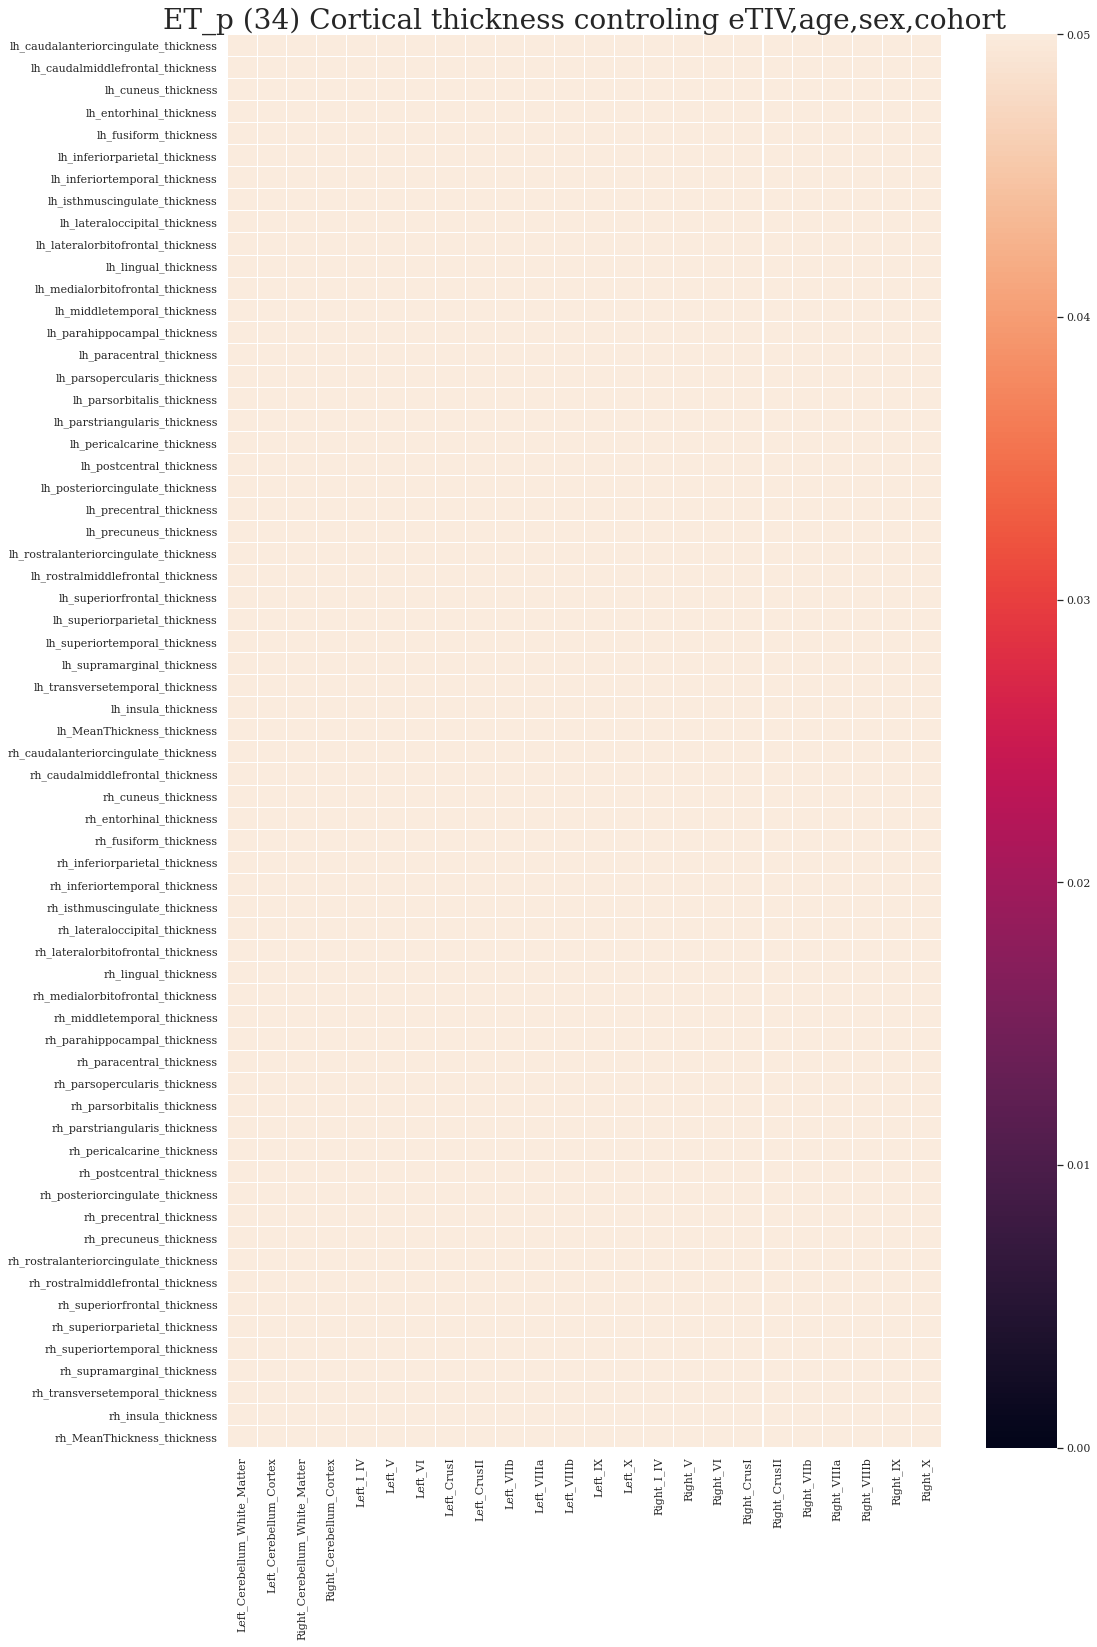

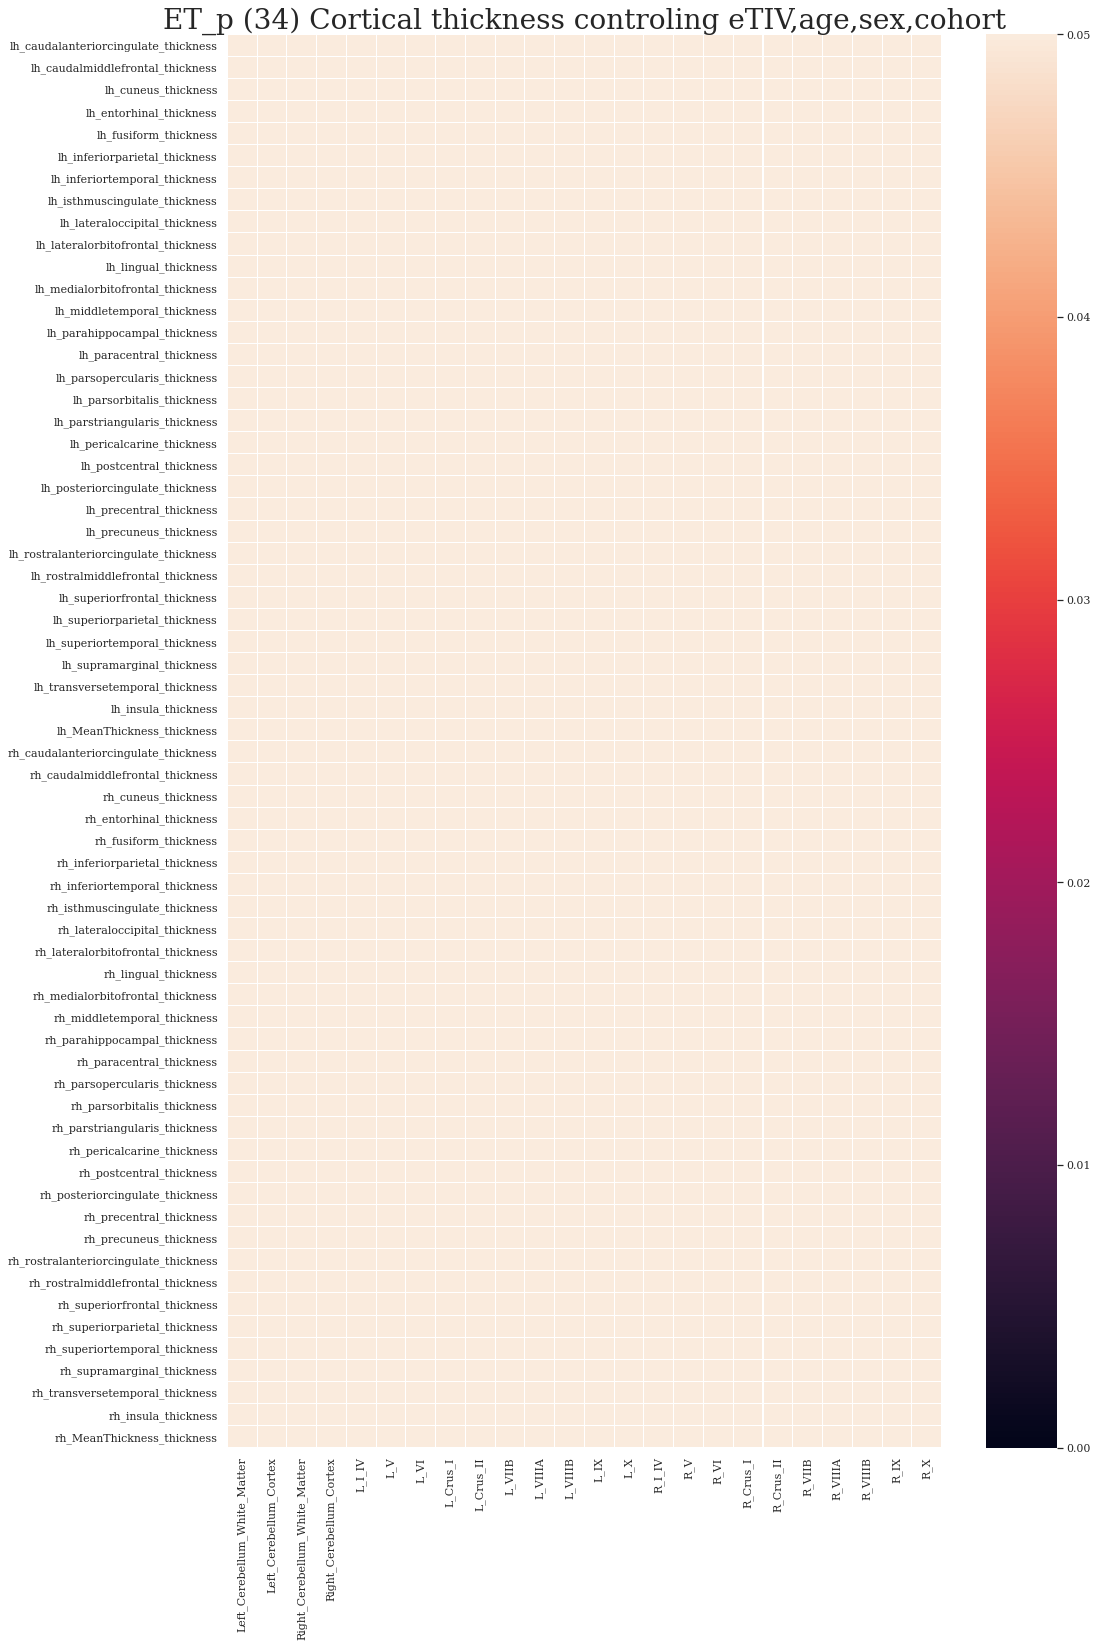

In [77]:
cere_labels=raw_DKT['cth']['cerebellar_list']; cere_len = len(cere_labels);
cort_labels=raw_DKT['cth']['cortical_list'];   cort_len = len(cort_labels);
raw_DKT['cth']['ET_p'].iloc[cere_len:,:cere_len]

sv_fig=0
C_MAP_='bone';
figure_size = (16, 26); 
VMIN = 0.05; 
VMAX = 0;
def simple_heat(df, VMIN, VMAX, C_MAP, title_str):
    print('Visualizing: ',title_str)
    # vis config
    f = plt.figure(figsize=figure_size, facecolor='w', edgecolor='lightgray')
    sns.set_theme(style="whitegrid", font_scale=1)
    sns.color_palette("YlOrBr", as_cmap=True)
    sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
    #vis
    ax=sns.heatmap(df, vmax=VMAX, vmin=VMIN, linewidths=.05)
    ax.set_title(title_str, fontsize=28)
    

simple_heat(suit_ctr_DKT['cth']['ET_p'].iloc[cere_len:,:cere_len], VMIN, VMAX, C_MAP_, 'ET_p (34) Cortical thickness controling eTIV,age,sex,cohort')
simple_heat(maget_ctr_DKT['cth']['ET_p'].iloc[cere_len:,:cere_len], VMIN, VMAX, C_MAP_, 'ET_p (34) Cortical thickness controling eTIV,age,sex,cohort')
simple_heat(maget_ctr_DKT['cth']['ET_p'].iloc[cere_len:,:cere_len], VMIN, VMAX, C_MAP_, 'ET_p (34) Cortical thickness controling eTIV,age,sex,cohort')

In [ ]:
# Direct comparison of cortical thickness/cortical volumes/cortical area
figure_size=(26, 16); 
FONT_SCALE=2.4;
legend_font_size=24
save_fig=1
C_MAP='coolwarm'; TH=0

def vis_corr_mat(df, title_str, sv_fig):
    print('Visualizing: ',title_str)
    # vis config
    f = plt.figure(figsize=figure_size, facecolor='w', edgecolor='lightgray')
    sns.set_theme(style="whitegrid", palette="pastel", font_scale=1)
    sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
    # data
    corr_=df.corr()
    mask_=corr_.where(np.abs(corr_)>TH, True).copy()
    mask_=mask_.applymap(lambda x: False if isinstance(x, float) else True, na_action='ignore')
    #vis
    ax=sns.heatmap(corr_, annot=False, fmt=".2f", mask=mask_, #ax=ax_,
                   vmax=1, vmin=-1, cmap=C_MAP, square=True, linewidths=.05)
    ax.set_title(title_str, fontsize=28)
    x=len(cerebellum_list);
    plt.axhline(x, ls='--',c='k', lw=3); plt.axvline(x, ls='--',c='k', lw=3)
    if save_fig: print('saving...'); f.savefig((fig_dir/("sc_"+title_str+".jpg")), dpi=300, bbox_inches='tight', pad_inches=0.1)
    #display(corr_)

# SUIT
vis_corr_mat(ctr_DKT['cth']['ET'], 'SUIT_1_ET (34) Cortical thickness controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(ctr_DKT['area']['ET'],'SUIT_1_ET (34) Cortical area controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(ctr_DKT['vol']['ET'], 'SUIT_1_ET (34) Cortical volume controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(ctr_DKT['cth']['NC'], 'SUIT_1_NC (177) Cortical thickness controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(ctr_DKT['area']['NC'],'SUIT_1_NC (177) Cortical area controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(ctr_DKT['vol']['NC'], 'SUIT_1_NC (177) Cortical volume controling eTIV,age,sex,cohort', save_fig)

vis_corr_mat(raw_DKT['cth']['ET'], 'SUIT_1_ET (34) Cortical thickness without correction', save_fig)
vis_corr_mat(raw_DKT['area']['ET'],'SUIT_1_ET (34) Cortical area without correction', save_fig)
vis_corr_mat(raw_DKT['vol']['ET'], 'SUIT_1_ET (34) Cortical volume without correction', save_fig)
vis_corr_mat(raw_DKT['cth']['NC'], 'SUIT_1_NC (177) Cortical thickness without correction', save_fig)
vis_corr_mat(raw_DKT['area']['NC'],'SUIT_1_NC (177) Cortical area without correction', save_fig)
vis_corr_mat(raw_DKT['vol']['NC'], 'SUIT_1_NC (177) Cortical volume without correction', save_fig)

## MAGeT
vis_corr_mat(maget_ctr_DKT['cth']['ET'], 'MAGeT_1_ET (34) Cortical thickness controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(maget_ctr_DKT['area']['ET'],'MAGeT_1_ET (34) Cortical area controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(maget_ctr_DKT['vol']['ET'], 'MAGeT_1_ET (34) Cortical volume controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(maget_ctr_DKT['cth']['NC'], 'MAGeT_1_NC (177) Cortical thickness controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(maget_ctr_DKT['area']['NC'],'MAGeT_1_NC (177) Cortical area controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(maget_ctr_DKT['vol']['NC'], 'MAGeT_1_NC (177) Cortical volume controling eTIV,age,sex,cohort', save_fig)

vis_corr_mat(maget_raw_DKT['cth']['ET'], 'MAGeT_1_ET (34) Cortical thickness without correction', save_fig)
vis_corr_mat(maget_raw_DKT['area']['ET'],'MAGeT_1_ET (34) Cortical area without correction', save_fig)
vis_corr_mat(maget_raw_DKT['vol']['ET'], 'MAGeT_1_ET (34) Cortical volume without correction', save_fig)
vis_corr_mat(maget_raw_DKT['cth']['NC'], 'MAGeT_1_NC (177) Cortical thickness without correction', save_fig)
vis_corr_mat(maget_raw_DKT['area']['NC'],'MAGeT_1_NC (177) Cortical area without correction', save_fig)
vis_corr_mat(maget_raw_DKT['vol']['NC'], 'MAGeT_1_NC (177) Cortical volume without correction', save_fig)

Text(0.5, 1.0, 'Mean cortical thickness between ET and NC (Augmented cohort, Destrieux 2009a Atlas)')

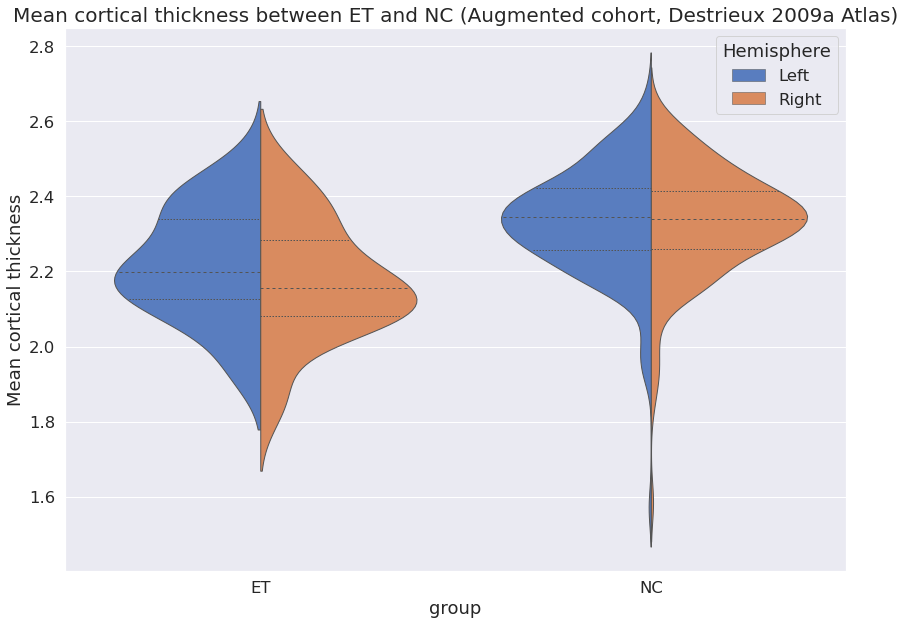

In [5]:
#Mean cortical thickness for left and right hemisphere
lr_mct_vis=data_df.copy()

l_mct=lr_mct_vis[['group','cohort','lh_MeanThickness_thickness']].copy(); 
l_mct.loc[:,'Hemisphere']='Left'; 
l_mct.loc[:,'Mean cortical thickness']=l_mct.loc[:,'lh_MeanThickness_thickness'];
#l_mct=l_mct.drop(columns=['left_mean_cortical_thickness'])

r_mct=lr_mct_vis[['group','cohort','rh_MeanThickness_thickness']].copy(); 
r_mct.loc[:,'Hemisphere']='Right'; 
r_mct.loc[:,'Mean cortical thickness']=r_mct.loc[:,'rh_MeanThickness_thickness'];
#r_mct=r_mct.drop(columns=['rh_MeanThickness_thickness'])

vis_df=pd.concat([r_mct, l_mct])
vis_df=vis_df.sort_values(by=['Hemisphere'], ascending=1)

vis_mni_df=vis_df.copy()
vis_mni_df=vis_mni_df[vis_mni_df['cohort']=='MNI'];
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

# Draw a nested violinplot and split the violins for easier comparison
fig, ax = plt.subplots(figsize=(14, 10))
sns.violinplot(data=vis_df, x="group", y="Mean cortical thickness", hue="Hemisphere", order=['ET','NC'],split=True, inner="quartile", linewidth=1, palette="muted", ax=ax)
#sns.despine(left=True)
ax.set_title('Mean cortical thickness between ET and NC (Augmented cohort, Destrieux 2009a Atlas)', fontsize=20)
#fig.savefig("AugCohort_SUIT-MAGeT_comp.jpg")